https://moonbooks.org/Articles/How-to-calculate-a-log-likelihood-in-python-example-with-a-normal-distribution-/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

Generate a dataset from normal distribution, with $\mu = 3.0$ and $\sigma = 0.5$.

In [2]:
mu = 3.0
sigma = 0.5

data = np.random.randn(100000) * sigma + mu

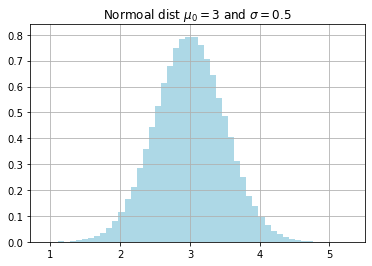

In [5]:
hx, hy, _ = plt.hist(data, bins=50, density=True, color="lightblue")

plt.ylim(0.0, max(hx) + 0.05)
plt.title(r'Normoal dist $\mu_0 = 3$ and $\sigma = 0.5$')
plt.grid()


Calculate the log-likelihood.

Here the `pdf` function is used to calculated the log-likelihood. NOTE that probability density function is the cumulative probability for continuous variables.

```
a probability density function (PDF), or density of a continuous random variable, is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample.
```

`pdf(x, loc=0, scale=1)` get the pdf of x, given the distribution's parameters.
	

Probability density function.

logpdf(x, loc=0, scale=1)

$F(\theta) = \sum_{i=1}^{n}{ln f_i(y_i | \theta)} $

In [14]:
scipy.stats.norm.pdf(6, 2.0, 1.0)

print(np.log(scipy.stats.norm.pdf(data, 2.0, 1.0)).sum())

-154194.21189020935


Below is the log pdf of $-10$ given a normal distribution of $\mu = 2.0$ and $\sigma = 1.0$

In [21]:
np.log(scipy.stats.norm.pdf(-10, 2.0, 1.0))

-72.91893853320467

Below we calculated the sum of the data given a normal distribution of $\mu = -10.0$ and $\sigma = 0.5$. The meaning of this value is: if the normal distribution has a $\mu = -10.0$, what is the log likelihood of the current dataset.

In [23]:
print(np.log(scipy.stats.norm.pdf(data, -10, 0.5)).sum())

-33866077.15378501


Below we generate 1000 values between `-10.0` and `10.0` and calculate each value' log pdf, i.e, if the normal distribution's center is this value, what is the sum of the log likehood of the dataset.

-10.0
-9.97997997997998
-9.95995995995996
-9.93993993993994
-9.91991991991992
-9.8998998998999
-9.87987987987988
-9.85985985985986
-9.83983983983984
-9.81981981981982
-9.7997997997998
-9.77977977977978
-9.75975975975976
-9.73973973973974
-9.71971971971972
-9.6996996996997
-9.67967967967968
-9.65965965965966
-9.63963963963964
-9.61961961961962
-9.5995995995996
-9.57957957957958
-9.55955955955956
-9.53953953953954
-9.51951951951952
-9.4994994994995
-9.47947947947948
-9.45945945945946
-9.43943943943944
-9.41941941941942
-9.3993993993994
-9.37937937937938
-9.35935935935936
-9.33933933933934
-9.31931931931932
-9.2992992992993
-9.27927927927928
-9.25925925925926
-9.23923923923924
-9.21921921921922
-9.1991991991992
-9.17917917917918
-9.15915915915916
-9.13913913913914
-9.11911911911912
-9.0990990990991
-9.07907907907908
-9.05905905905906
-9.03903903903904
-9.01901901901902
-8.998998998999
-8.97897897897898
-8.95895895895896
-8.93893893893894
-8.91891891891892
-8.8988988988989
-8.8788788788788

-0.2702702702702702
-0.25025025025025016
-0.23023023023023015
-0.21021021021021014
-0.19019019019019012
-0.1701701701701701
-0.1501501501501501
-0.13013013013013008
-0.11011011011011007
-0.09009009009009006
-0.07007007007007005
-0.05005005005005003
-0.03003003003003002
-0.010010010010010006
0.010010010010010006
0.03003003003003002
0.05005005005005003
0.07007007007007005
0.09009009009009006
0.11011011011011007
0.13013013013013008
0.1501501501501501
0.1701701701701701
0.19019019019019012
0.21021021021021014
0.23023023023023015
0.25025025025025016
0.2702702702702702
0.2902902902902902
0.3103103103103102
0.3303303303303302
0.3503503503503502
0.37037037037037024
0.39039039039039025
0.41041041041041026
0.4304304304304303
0.4504504504504503
0.4704704704704703
0.4904904904904903
0.5105105105105103
0.5305305305305303
0.5505505505505504
0.5705705705705704
0.5905905905905904
0.6106106106106104
0.6306306306306304
0.6506506506506504
0.6706706706706704
0.6906906906906904
0.7107107107107105
0.7307307

9.65965965965966
9.67967967967968
9.6996996996997
9.71971971971972
9.73973973973974
9.75975975975976
9.77977977977978
9.7997997997998
9.81981981981982
9.83983983983984
9.85985985985986
9.87987987987988
9.8998998998999
9.91991991991992
9.93993993993994
9.95995995995996
9.97997997997998
10.0


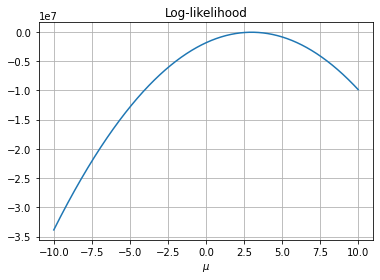

In [24]:
x = np.linspace(-10, 10, 1000, endpoint=True)

y = []

for i in x:
    print(i)
    tmp_log_lkh = np.log(scipy.stats.norm.pdf(data, i, 0.5))
    y.append(tmp_log_lkh.sum())

plt.plot(x,y)
plt.title(r'Log-likelihood')
plt.xlabel(r'$\mu$')

plt.grid()


We can also use `logpdf()` directly

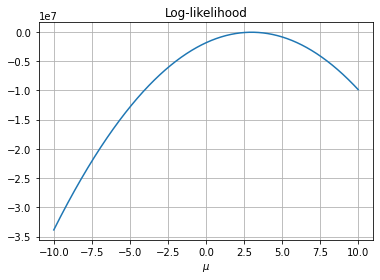

In [12]:
x = np.linspace(-10, 10, 1000, endpoint=True)

y = []

for i in x:
    y.append(scipy.stats.norm.logpdf(data, i, 0.5).sum())

plt.plot(x,y)
plt.title(r'Log-likelihood')
plt.xlabel(r'$\mu$')

plt.grid()


mean estimated from the maximum of the log-likehood:

In [13]:
y_min = y.index(max(y))
print(max(y))
print(y_min)
print('\nmean (from max log likelohood) ---> ', x[y_min])

-72262.34349656718
649

mean (from max log likelohood) --->  2.9929929929929937


Let's have a look at $DIC$ again.

"DIC uses the average log-likelihood over the posterior distribution as a measure of goodness-of-fit, and the difference between this average and the log-likelihood at some fixed, central point of the posterior as a measure of flexibility, with greater differences resulting in harsher penalties." Evans 2019

$$ DIC = 2 * \widehat {elpd_{DIC}} $$
$$\widehat {elpd_{DIC}} = log[(y | \hat{\theta}_{Bayes})] - k_{DIC}$$
$$ k_{DIC} = 2var_{posterior}(log[p(y | \theta)]$$

`deviance` is defined by [`-2 * sum[v.get_logp() for v in self.observed_stochastics])`](https://github.com/pymc-devs/pymc/blob/6b1b51ddea1a74c50d9a027741252b30810b29e0/pymc/Model.py#L219).

`mean_deviance = np.mean(self.db.trace('deviance')(). axis=0)`

`dic` is `2* mean_deviance - self.deviance`

https://studystics1.medium.com/odyssey-of-a-data-scientist-information-criteria-aic-bic-dic-waic-both-r-and-python-code-d11a4ac1c0be

In Evans (2019), `DIC` is defined slightly different:

$\bar{D} = \frac{1}{S} \sum_{s=1}^{S} log [p(y | \theta_s]$

$P_{D} = max[log[p(y|\theta)]] - \bar{D}$

$DIC = -2(\bar{D} - P_{D}) = -2(\bar{D} - (max[log[p(y|\theta)]] - \bar{D})) =  -2(2* \bar{D} - (max[log[p(y|\theta)]]))$